# Исследование ДТП в Кировской области

Автор: Галимова Лидия

Дата: 15.10.2025

#### Цели и задачи:

##### Цель: 
* Проанализировать качество данных, провести исследование данных и изучить взаимосвязи по запросу заказчика (например, с чем может быть связана аварийность на дорогах).

##### Задачи: 
* Проверить данные на дубликаты и пропуски
* Проверить корректность типов данных и названий столбцов
* Провести исследование данных

#### Описание данных:

##### Датасет Kirovskaya_oblast.csv содержит информацию о ДТП:
* geometry.coordinates — координаты ДТП;
* id — идентификатор ДТП;
* properties.tags — тег происшествия;
* properties.light — освещённость;
* properties.point.lat — широта;
* properties.point.long — долгота;
* properties.nearby — ближайшие объекты;
* properties.region — регион;
* properties.scheme — схема ДТП;
* properties.address — ближайший адрес;
* properties.weather — погода;
* properties.category — категория ДТП;
* properties.datetime — дата и время ДТП;
* properties.injured_count — число пострадавших;
* properties.parent_region — область;
* properties.road_conditions — состояние покрытия;
* properties.participants_count — число участников;
* properties.participant_categories — категории участников.

##### Датасет Kirovskaya_oblast_participiants.csv хранит сведения об участниках ДТП:
* role — роль;
* gender — пол;
* violations — какие правила дорожного движения были нарушены конкретным участником;
* health_status — состояние здоровья после ДТП;
* years_of_driving_experience — число лет опыта;
* id — идентификатор ДТП.

# 1.Предобработка данных

In [52]:
#загружаем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
#выгружаем данные 
Kir_obl = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')
Kir_par = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')

#### Предобработка датасета Kir_obl

In [3]:
#проверяем данные Kir_obl (первые 5 строк)
Kir_obl.head()

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


In [4]:
#выводим информацию о датасете Kir_obl
Kir_obl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               14517 non-null  object 
 1   id                                 14517 non-null  int64  
 2   properties.tags                    14517 non-null  object 
 3   properties.light                   14517 non-null  object 
 4   properties.point.lat               14485 non-null  float64
 5   properties.point.long              14485 non-null  float64
 6   properties.nearby                  14517 non-null  object 
 7   properties.region                  14517 non-null  object 
 8   properties.scheme                  13380 non-null  float64
 9   properties.address                 13843 non-null  object 
 10  properties.weather                 14517 non-null  object 
 11  properties.category                14517 non-null  obj

Необходимо заменить названия столбцов на наиболее подходящие для работы. Наблюдается наличие пропусков в столбцах properties.point.lat,properties.point.long,properties.scheme,properties.address, но по условиям задания пропуски не критичны и не влияют на результат корреляций. Также необходимо заменить тип данных в столбце properties.datetime.

In [5]:
#Меняем названия столбцов
Kir_obl.columns=[col.lower().replace('.','_').replace('properties_','') for col in Kir_obl.columns]

In [6]:
#Меняем тип данных на datetime
Kir_obl['datetime']=pd.to_datetime(Kir_obl['datetime'])

In [7]:
#Меняем тип данных для экономии памяти
Kir_obl['id']=pd.to_numeric(Kir_obl['id'],downcast='integer')# выбирает автоматически нужный формат
Kir_obl['injured_count']=pd.to_numeric(Kir_obl['injured_count'],downcast='integer')
Kir_obl['participants_count']=pd.to_numeric(Kir_obl['participants_count'],downcast='integer')

In [8]:
# Выводим количество пропущенных строк в датафрейме
Kir_obl.isna().sum()

geometry_coordinates         0
id                           0
tags                         0
light                        0
point_lat                   32
point_long                  32
nearby                       0
region                       0
scheme                    1137
address                    674
weather                      0
category                     0
datetime                     0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

In [9]:
# Подсчитываем процент строк с пропусками
Kir_obl.isna().sum()/len(Kir_obl)*100

geometry_coordinates      0.000000
id                        0.000000
tags                      0.000000
light                     0.000000
point_lat                 0.220431
point_long                0.220431
nearby                    0.000000
region                    0.000000
scheme                    7.832197
address                   4.642833
weather                   0.000000
category                  0.000000
datetime                  0.000000
injured_count             0.000000
parent_region             0.000000
road_conditions           0.000000
participants_count        0.000000
participant_categories    0.000000
dtype: float64

В столбцах point_lat и point_long всего по 0,22% пропусков, так как признак не ключевой, строки с пропусками можно удалить, или поставить маркер "Unknown". В столбце scheme почти 8% пропусков, в столбце address 4.6%. Данные не являются ключевыми, можно также удалить строки или поставить маркер "Unknown". В данном проекте все пропущенные значения заменим маркерами "Unknown".

In [10]:
#Заменяем пропуски значением Unknown
Kir_obl['point_lat'].fillna('Unknown',inplace=True)#inplace=True изменения вносятся прямо в текущий DataFrame, без создания копии.
Kir_obl['point_long'].fillna('Unknown',inplace=True)
Kir_obl['scheme'].fillna('Unknown',inplace=True)
Kir_obl['address'].fillna('Unknown', inplace=True)

In [11]:
#Поиск явных дубликатов
Kir_obl.duplicated().sum()

0

In [12]:
#Выводим информацию об обновленном датафрейме
Kir_obl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geometry_coordinates    14517 non-null  object        
 1   id                      14517 non-null  int32         
 2   tags                    14517 non-null  object        
 3   light                   14517 non-null  object        
 4   point_lat               14517 non-null  object        
 5   point_long              14517 non-null  object        
 6   nearby                  14517 non-null  object        
 7   region                  14517 non-null  object        
 8   scheme                  14517 non-null  object        
 9   address                 14517 non-null  object        
 10  weather                 14517 non-null  object        
 11  category                14517 non-null  object        
 12  datetime                14517 non-null  dateti

#### Предобработка датасета Kir_par

In [13]:
#проверяем данные Kir_par (первые 5 строк)
Kir_par.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


In [14]:
#выводим информацию о датасете Kir_par
Kir_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
#Меняем тип данных для экономии памяти
Kir_par['id']=pd.to_numeric(Kir_par['id'],downcast='integer')
Kir_par['years_of_driving_experience']=pd.to_numeric(Kir_par['years_of_driving_experience'],downcast='float')

In [16]:
# Выводим количество пропущенных строк в датафрейме
Kir_par.isna().sum()

role                               0
gender                           848
violations                         0
health_status                    100
years_of_driving_experience    14326
id                                 0
dtype: int64

In [17]:
# Подсчитываем процент строк с пропусками
Kir_par.isna().sum()/len(Kir_par)*100

role                            0.000000
gender                          2.714903
violations                      0.000000
health_status                   0.320154
years_of_driving_experience    45.865215
id                              0.000000
dtype: float64

In [18]:
#Заменяем пропуски значением Unknown
Kir_par['gender'].fillna('Unknown',inplace=True)
Kir_par['health_status'].fillna('Unknown',inplace=True)
Kir_par['years_of_driving_experience'].fillna('Unknown',inplace=True)

In [19]:
#Поиск явных дубликатов
Kir_par.duplicated().sum()

9727

In [20]:
#Находим процент явных дубликатов
Kir_par.duplicated().sum()/len(Kir_par)*100

31.141347846966543

In [21]:
#Удаляем явные дубликаты
Kir_par=Kir_par.drop_duplicates()

In [22]:
#Выводим информацию об обновленном датафрейме
Kir_par.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21508 entries, 0 to 31232
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         21508 non-null  object
 1   gender                       21508 non-null  object
 2   violations                   21508 non-null  object
 3   health_status                21508 non-null  object
 4   years_of_driving_experience  21508 non-null  object
 5   id                           21508 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 1.1+ MB


### Вывод: 

При проведении предобработки данных были обнаружены и исправлены недочеты в типах данных, были переименованы некоторые столбцы для удобства дальнейшей работы. Такдже была проведена проверка на наличие пропусков и дубликатов (явных). Все обнаруженные пропуски в данных были заменены на значение "Unknown", все явные дубликаты удалены. Таким образом, данные скорректированы и подготовлены к дальнейшему анализу.

# 2. Исследовательский анализ данных

2.1. Как распределено количество участников ДТП? Как вы считаете, почему распределение такое? Встречаются ли аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Для числа участников найдите наиболее типичное значение. По желанию можете проверить распределения и других столбцов.

In [23]:
print(Kir_obl['participants_count'].describe())

count    14517.000000
mean         2.355721
std          1.004847
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: participants_count, dtype: float64


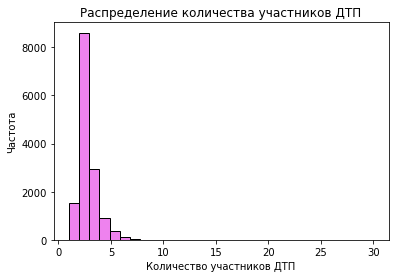

In [24]:
plt.hist(Kir_obl['participants_count'],bins=30,color='violet',edgecolor='black')
plt.xlabel('Количество участников ДТП')
plt.ylabel('Частота')
plt.title('Распределение количества участников ДТП')
plt.show()

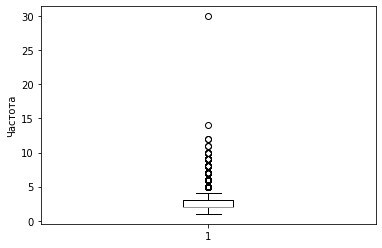

In [25]:
plt.boxplot(Kir_obl['participants_count'].dropna())
plt.ylabel('Частота')
plt.show()

In [26]:
display(Kir_obl[Kir_obl['participants_count']==30])

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
7104,"[49.611833, 58.585626]",2822118,Дорожно-транспортные происшествия,Светлое время суток,58.585626,49.611833,"['Выезд с прилегающей территории', 'Крупный то...",Киров,930.0,"г Киров, ул Производственная, 24В",['Пасмурно'],Наезд на препятствие,2023-04-27 15:14:00,30,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",30,['Все участники']


In [27]:
mode_participants_count=Kir_obl['participants_count'].mode()[0]
print('Наиболее типичное значение для числа участников ДТП:', mode_participants_count)

Наиболее типичное значение для числа участников ДТП: 2


По результатам видно, что основное количество участников ДТП - 2 человека. Второе место по частоте участников - аварии с 3 участниками, далее - с 1 участником. В данных присутствуют аномальные значения и выбросы, например - 30 человек в одном ДТП, это может говорить либо о групповом столкновении (цепная реакция на трассе), либо об аварии с участием общественного транспорта (автобус, трамвай и т.д.). Также возможна ошибка в данных (например, по факту было 3 участника, а не 30). Также можно заметить, что 50% всех ДТП - это аварии не более, чем с 2-мя участниками. А 75% всех ДТП - не более чем с 3-мя участниками.

Для более глубокого анализа рассмотрим распределение по столбцам с количеством пострадавших, погодным условиям, освещенности и категории ДТП.

In [28]:
Kir_obl['injured_count'].describe()

count    14517.000000
mean         1.315699
std          0.793685
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         30.000000
Name: injured_count, dtype: float64

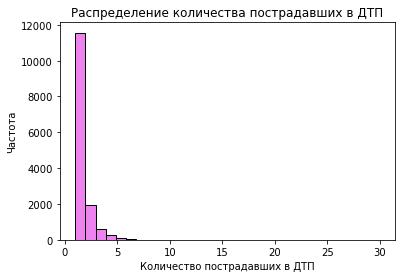

In [29]:
plt.hist(Kir_obl['injured_count'],bins=30,color='violet',edgecolor='black')
plt.xlabel('Количество пострадавших в ДТП')
plt.ylabel('Частота')
plt.title('Распределение количества пострадавших в ДТП')
plt.show()

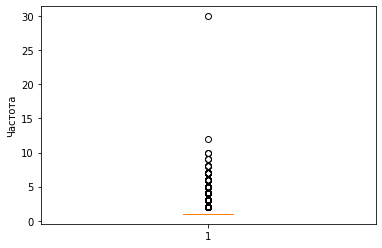

In [30]:
plt.boxplot(Kir_obl['injured_count'].dropna())
plt.ylabel('Частота')
plt.show()

In [31]:
mode_injured_count=Kir_obl['injured_count'].mode()[0]
print('Наиболее типичное значение для числа пострадавших в ДТП:', mode_injured_count)

Наиболее типичное значение для числа пострадавших в ДТП: 1


По результатам видно, что основное количество пострадавших в  ДТП - 1 человек.  В данных присутствуют аномальные значения и выбросы, например - 30 пострадавших в одном ДТП, это может говорить либо о групповом столкновении (цепная реакция на трассе), либо об аварии с участием общественного транспорта (автобус, трамвай и т.д.). Также возможна ошибка в данных (например, по факту было 3 пострадавших, а не 30). Также можно заметить, что 25%, 50% и 75% всех ДТП - это аварии не более, чем с 1 пострадавшим.

In [32]:
Kir_obl['light'].describe()

count                   14517
unique                      5
top       Светлое время суток
freq                     9258
Name: light, dtype: object

Text(0.5, 1.0, 'Распределение ДТП по условиям освещённости')

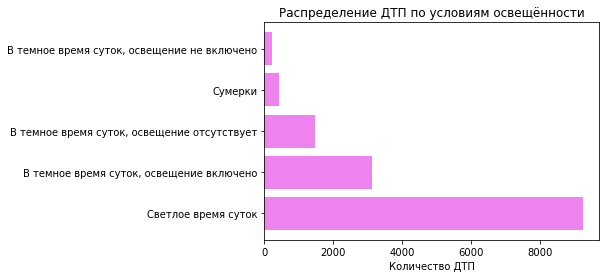

In [33]:
counts_light=Kir_obl['light'].value_counts()
plt.barh(counts_light.index,counts_light.values,color='violet')
plt.xlabel('Количество ДТП')
plt.title('Распределение ДТП по условиям освещённости')

Анализ показал, что наибольшее количество ДТП приходится на светлое время суток, что, вероятнее всего, связано с повышенной интенсивностью движения в дневные часы.

In [34]:
Kir_obl['weather'].describe()

count            14517
unique              18
top       ['Пасмурно']
freq              6701
Name: weather, dtype: object

Text(0.5, 0, 'Количество ДТП')

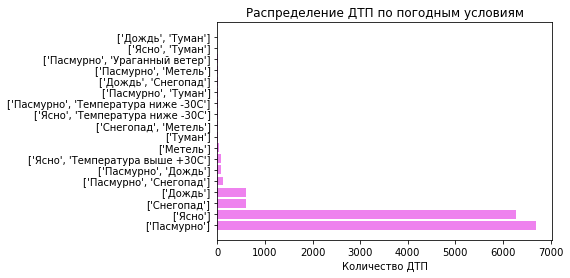

In [35]:
counts_weather=Kir_obl['weather'].value_counts()
plt.barh(counts_weather.index,counts_weather.values,color='violet')
plt.title('Распределение ДТП по погодным условиям')
plt.xlabel('Количество ДТП')

Анализ данного столбца показал, что больше половины ДТП происходит в пасмурную или ясную погоду.

In [36]:
Kir_obl['category'].describe()

count            14517
unique              16
top       Столкновение
freq              5423
Name: category, dtype: object

Text(0.5, 1.0, 'Распределение ДТП по категориям')

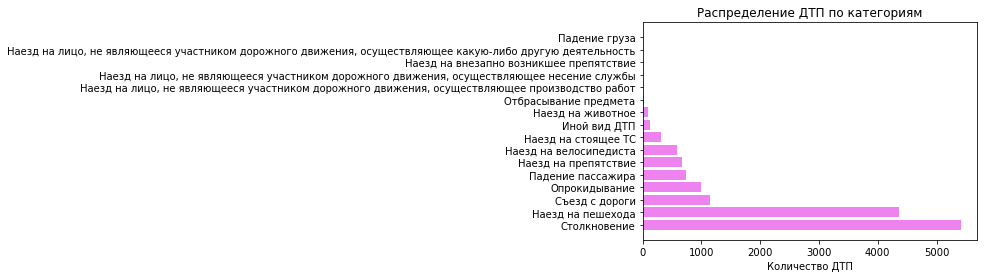

In [37]:
counts_category=Kir_obl['category'].value_counts()
plt.barh(counts_category.index,counts_category.values,color='violet')
plt.xlabel('Количество ДТП')
plt.title('Распределение ДТП по категориям')

Анализ категорий показал, что большинство ДТП относится к категории 'Столкновение', следующая по частоте категория - 'Наезд на пешехода'. Эти две категории составляют более половины всех ДТП в Кировской области, исходя из этих данных.

2.2. Предположите, между какими столбцами в датасете Kirovskaya_oblast.csv высокая корреляция? Проверьте своё предположение.

Исходя из имеющихся данных, можно предположить, что имеется высокая корреляция между столбцами participants_count и injured_count (число участников ДТП и число пострадавших).

In [38]:
#Проверяем корреляцию (считаем коэффициент корреляции Пирсона)
corr_value=Kir_obl["participants_count"].corr(Kir_obl['injured_count'])
print('Корреляция между столбцами participants_count и injured_count (число участников ДТП и число пострадавших):', round(corr_value,2))

Корреляция между столбцами participants_count и injured_count (число участников ДТП и число пострадавших): 0.73


Значение коэффициента корреляции Пирсона = 0.73, что указывает на достаточно сильную положительную связь. То есть, чем больше участников ДТП, тем больше пострадавших.

Добавим для наглядности дианграмму рассеяния

Text(0, 0.5, 'Количество пострадавших')

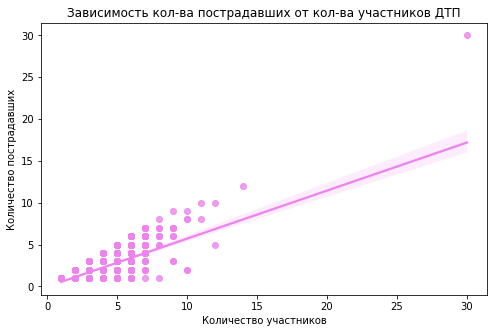

In [39]:
plt.figure(figsize=(8,5))
sns.regplot(data=Kir_obl,
           x='participants_count',
            y='injured_count',
            color='violet'
           )
plt.title('Зависимость кол-ва пострадавших от кол-ва участников ДТП')
plt.xlabel('Количество участников')
plt.ylabel('Количество пострадавших')

На графике видно, что корреляция положительная - чем больше участников ДТП, тем больше вероятность, что кто-то пострадает.
Облако точек показывает, что зависимость не идеально линейная — при одинаковом числе участников количество пострадавших может различаться (влияют скорость, условия, тип транспорта и т. д.).

2.3. Как связаны категории аварий и погодные условия?

Text(32.96874999999999, 0.5, 'Погодные условия')

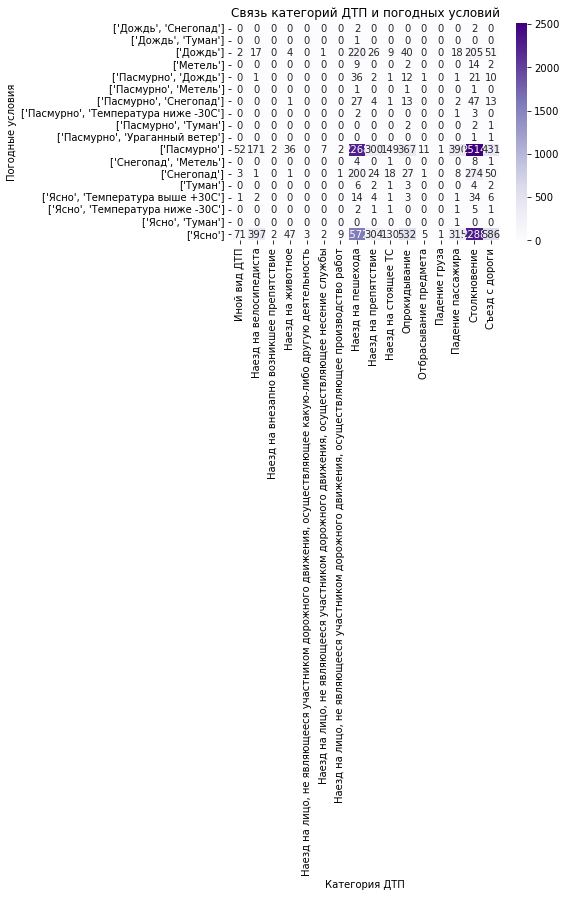

In [40]:
#построим таблицу сопряженности и тепловую карту
cross_tab=pd.crosstab(Kir_obl['weather'],Kir_obl['category'])
sns.heatmap(cross_tab,annot=True,fmt='d',cmap='Purples')
plt.title('Связь категорий ДТП и погодных условий')
plt.xlabel('Категория ДТП')
plt.ylabel('Погодные условия')

In [41]:
#проверим связь столбцов, применив критерий хи-квадрат.
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'χ² = {chi2:.2f}, p-value = {p:.4f}')

χ² = 527.44, p-value = 0.0000


p-value = 0.0000 - означает, что вероятность того, что такая зависимость получилась случайно, практически нулевая. То есть это говорит о том, что между категорией ДТП и погодой есть статистически значимая зависимость. 
Большинство ДТП в Кировской области происходит при ясной или пасмурной погоде, что объясняется большей активностью водителей в эти периоды.

2.4. Постройте процентную разбивку аварий по видам освещённости. При этом учитывайте пол участника и сделайте расчёты для мужчин и женщин отдельно.

In [42]:
#объединим датафреймы в один общий - merged_dtp
merged_dtp=pd.merge(Kir_obl,Kir_par,on='id',how='left')

In [43]:
# Группируем по полу и освещённости
light_gender=(
merged_dtp.groupby(['gender','light'])
    .size() #считаем кол-во строк ДТП в каждой группе
    .groupby(level=0) #группируем полученный результат по уровню индекса
    .apply(lambda x: 100*x/x.sum()) #считаем процент
    .reset_index(name='percentage') #сбрасываем индекс
)
display(light_gender)

,gender,light,percentage
0,Unknown,"В темное время суток, освещение включено",25.314183
1,Unknown,"В темное время суток, освещение не включено",1.077199
2,Unknown,"В темное время суток, освещение отсутствует",8.258528
3,Unknown,Светлое время суток,62.118492
4,Unknown,Сумерки,3.231598
5,Женский,"В темное время суток, освещение включено",22.407464
6,Женский,"В темное время суток, освещение не включено",1.269501
7,Женский,"В темное время суток, освещение отсутствует",9.177118
8,Женский,Светлое время суток,64.423371
9,Женский,Сумерки,2.722545


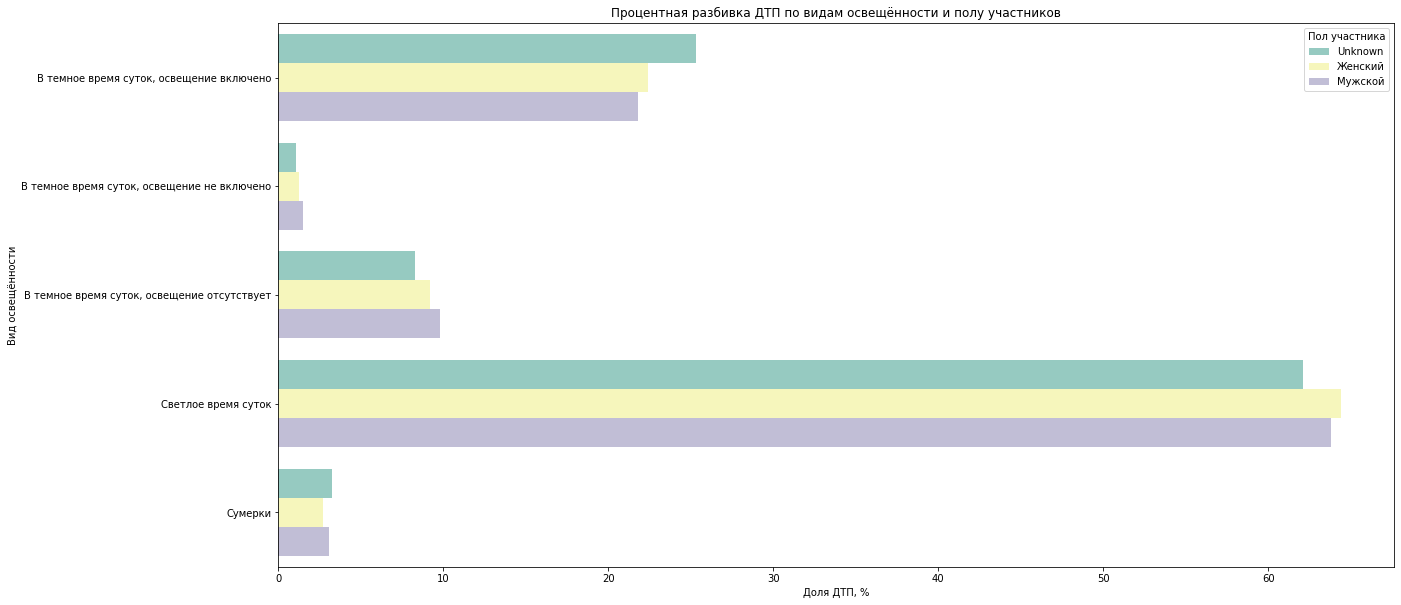

In [44]:
#строим график
plt.figure(figsize=(20,10))
sns.barplot(
data=light_gender,
x='percentage',
y='light',
hue='gender',
palette='Set3')

plt.title('Процентная разбивка ДТП по видам освещённости и полу участников')
plt.xlabel('Доля ДТП, %')
plt.ylabel('Вид освещённости')
plt.legend(title='Пол участника')

Таким образом, на графике и в таблице видно, что и у мужчин, и у женщин большинство аварий происходит в светлое время суток. Это может быть связано с наибольшей загрузкой на дорогах. Меньше всего аварий и у мужчин, и у женщин происходит в темное время суток, когда освещение не включено. Также отдельно выделена категория "Unknown", где не указан пол участника ДТП. Для этой категории также характерно светлое время суток для большинства ДТП.

2.5. Исследуйте, чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более.

In [59]:
#проверим количество аварий, в которых нет пострадавших
Kir_obl['injured_count'].value_counts()

1     11562
2      1959
3       616
4       243
5        86
6        29
7        12
8         4
9         2
10        2
30        1
12        1
Name: injured_count, dtype: int64

В данном случае сравнение аварий без пострадавших с теми, в которых был один пострадавший или более невозможно, так как в данном датасете представлены только те ДТП, в которых 1 и более пострадавших.

2.6. Сделайте общий вывод о связи аварийности с другими факторами. Какие рекомендации вы можете дать заказчику?

### Общий вывод о связи аварийности с факторами:

На основе анализа датасета Kirovskaya_oblast.csv выявлены следующие закономерности:

#### Количество участников

Чем больше участников в ДТП, тем больше пострадавших.

#### Время суток и освещённость

Наибольшее количество ДТП приходится на светлое время суток.

#### Погодные условия

В ясную и пасмурную погоду совершается наибольшее количество ДТП.

#### Тип ДТП

Наезды на пешеходов и столкновения - наиболее распространенные категории ДТП.

### Рекомендации заказчику

Рекомендуется усилить контроль на участках с высокой концентрацией участников ДТП, оснастить пешеходные переходы разметкой, освещением и «островками безопасности», особенно там, где часто происходят наезды, проводить кампании для водителей о внимательности в дневное время, соблюдении скоростного режима и осторожности при пересечении с пешеходами. Также стоит учесть, что даже если большинство ДТП происходит при ясной и пасмурной погоде, стоит контролировать дороги в дождь и снег, своевременно очищать проезжую часть и применять противогололёдные средства.